# EXPLORATION 8. 나의 첫 번째 캐글 경진대회, 무작정 따라해보기

---

## Import

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join
import pandas as pd
import numpy as np
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [2]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

In [3]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [4]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [5]:
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [6]:
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [7]:
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [8]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

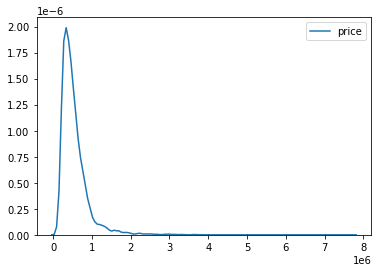

In [9]:
sns.kdeplot(y)
plt.show()

In [10]:
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

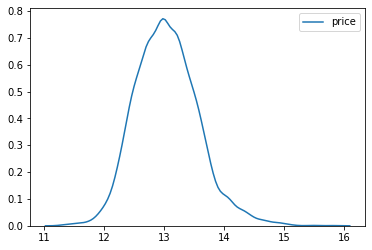

In [11]:
sns.kdeplot(y)
plt.show()

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

## GridSearch

In [13]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=5)
    grid_model.fit(train, y)
    
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    results = pd.DataFrame(params)
    results['score'] = score
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')
    
    return results

### LGBMRegressor

In [14]:
random_state = 2020
param_grid = {
    'objective':['regression'],
    'learning_rate' : [0.05],
    'n_estimators':[100,500,1000],
    'max_depth': [1, 10, 20, 30, 40, 50],
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    5.0s
[Parallel(n_jobs=5)]: Done  90 out of  90 | elapsed:   15.0s finished


,learning_rate,max_depth,n_estimators,objective,score,RMSLE
4,0.05,10,500,regression,-0.025927,0.161020
5,0.05,10,1000,regression,-0.025930,0.161028
8,0.05,20,1000,regression,-0.026044,0.161381
14,0.05,40,1000,regression,-0.026047,0.161392
11,0.05,30,1000,regression,-0.026047,0.161392
17,0.05,50,1000,regression,-0.026047,0.161392
16,0.05,50,500,regression,-0.026054,0.161413
10,0.05,30,500,regression,-0.026054,0.161413
13,0.05,40,500,regression,-0.026054,0.161413
7,0.05,20,500,regression,-0.026067,0.161453


### XGBRegressor

In [15]:
param_grid = {
    'learning_rate': [0.05],
    'subsample': [0.9],
    'n_estimators':[100,500,1000],
    'max_depth': [1, 5, 10, 20, 30, 40, 50],
}

model = XGBRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   22.0s
[Parallel(n_jobs=5)]: Done 105 out of 105 | elapsed:  2.6min finished


,learning_rate,max_depth,n_estimators,subsample,score,RMSLE
5,0.05,5,1000,0.9,-0.025476,0.159613
7,0.05,10,500,0.9,-0.025893,0.160913
8,0.05,10,1000,0.9,-0.025997,0.161236
4,0.05,5,500,0.9,-0.026010,0.161277
17,0.05,40,1000,0.9,-0.027226,0.165003
16,0.05,40,500,0.9,-0.027226,0.165003
20,0.05,50,1000,0.9,-0.027264,0.165119
19,0.05,50,500,0.9,-0.027264,0.165119
11,0.05,20,1000,0.9,-0.027273,0.165146
10,0.05,20,500,0.9,-0.027273,0.165147


### GradientBoostingRegressor

In [29]:
param_grid = {
    'learning_rate': [0.05],
    'subsample': [0.9],
    'n_estimators':[100,500,1000],
    'max_depth': [1, 5, 10, 20, 30, 40, 50],
}

model = GradientBoostingRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done 105 out of 105 | elapsed: 17.5min finished


,learning_rate,max_depth,n_estimators,subsample,score,RMSLE
5,0.05,5,1000,0.9,-0.025940,0.161059
4,0.05,5,500,0.9,-0.026410,0.162511
7,0.05,10,500,0.9,-0.028617,0.169166
8,0.05,10,1000,0.9,-0.028640,0.169232
6,0.05,10,100,0.9,-0.029133,0.170685
3,0.05,5,100,0.9,-0.031185,0.176592
11,0.05,20,1000,0.9,-0.034056,0.184542
10,0.05,20,500,0.9,-0.034056,0.184542
9,0.05,20,100,0.9,-0.034095,0.184647
20,0.05,50,1000,0.9,-0.034297,0.185193


### RandomForestRegressor

In [58]:
param_grid = {
    'n_estimators':[100,500,1000],
    'max_depth': [1, 5, 10, 20, 30, 40, 50],
}

model = RandomForestRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 105 out of 105 | elapsed:  9.3min finished


,max_depth,n_estimators,score,RMSLE
20,50,1000,-0.031371,0.177120
17,40,1000,-0.031372,0.177120
14,30,1000,-0.031374,0.177128
11,20,1000,-0.031396,0.177188
13,30,500,-0.031455,0.177356
16,40,500,-0.031461,0.177373
19,50,500,-0.031461,0.177373
10,20,500,-0.031488,0.177448
9,20,100,-0.031857,0.178485
15,40,100,-0.031862,0.178498


## Train & Submission

In [59]:
LGB_model1 = LGBMRegressor(max_depth=10, n_estimators=500, learning_rate=0.5, objective='regression', random_state=random_state)

In [60]:
LGB_model.fit(train, y)
LGB_prediction = LGB_model.predict(test)
LGB_prediction = np.expm1(LGB_prediction)

In [61]:
XGB_model = XGBRegressor(max_depth=5, n_estimators=1000, learning_rate=0.05, subsample=0.9, random_state=random_state)

In [62]:
XGB_model.fit(train, y)
XGB_prediction = XGB_model.predict(test)
XGB_prediction = np.expm1(XGB_prediction)

In [63]:
GBR_model = GradientBoostingRegressor(max_depth=5, n_estimators=1000, learning_rate=0.05, subsample=0.9, random_state=random_state)

In [64]:
GBR_model.fit(train, y)
GBR_prediction = GBR_model.predict(test)
GBR_prediction = np.expm1(GBR_prediction)

In [67]:
RFR_model = RandomForestRegressor(max_depth=50, n_estimators=1000, random_state=random_state)

In [68]:
RFR_model.fit(train, y)
RFR_prediction = RFR_model.predict(test)
RFR_prediction = np.expm1(RFR_prediction)

In [69]:
prediction = 0.25* XGB_prediction + 0.25*LGB_prediction + 0.25*RFR_prediction +0.25*GBR_prediction

In [70]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)

submission['price'] = prediction

submission_csv_path = '{}/submission_{}.csv'.format(data_dir, 'LGB_XGB_GBR_RFR')
submission.to_csv(submission_csv_path, index=False)

## Report

LGBMRegressor  
XGBRegressor  
GradientBoostingRegressor  
RandomForestRegressor  
4가지 모델을 GridSearch를 이용하여, 적절한 하이퍼파라미터를 찾고 학습을 하였습니다.  
4가지 모델의 예측결과를 평균하여, submission 하였습니다.

<br>

결과  
Private Score : 112663.37527  
Public Score : 112708.91755  